## **Current scenario: (Data:HFC.xlsx)**
#### Amzen is leading pharmaceutical company based in U.S. There drug Enbrel is one of the most sold drug across U.S. used in rheumatoid arthritis. Amzen has been various campaigns and promotional activities in the past to support sales of their drug. One such measure was copay support for the patients; Enbrel being the branded was expensive to most of the lower/middle income group people. Amzen used to support these patients through their copay scheme, in which they used to issue a copay card which could be used by the patients for the payment purpose. These cards were managed by an external third party “IMS”. The patients with the copay scheme were benefitted with the copay support of $4000 semi annually. 
## **Expected new scenario:**
#### According to the US healthcare scheme, each citizen has to be assured through life/health insurance. The insurance companies provide support to the patients in their treatment. All drugs covered through such insurance companies were categorized in different tier levels based on their coverage. i.e. a top tier drug was most covered and lower tier drug was least covered.
#### UHC was insurance company, which used to provide support to Enbrel patients, but it is expected that starting from year 2015 the Enbrel will be lowered downed in the tier level from position two to position three, this will lead to more burden to the Enbrel patients. On the other, the Enbrel alternative drug Humria is expect to have jump in tier level. Hence, it is expected that there will be huge amount of slippage from Enbrel to Humria drug.
#### The situation becomes more problematic as the UHC has also declared that they will no further accept copay cards from the patients.


```
Pat_Id:Patenet id of the copay user
Copay amount:Amount used through the card

Refill_date: Date of card usage

Optin: Whether subscribed to enbrel promotion campaign

Card_Status:Current status of the card

Channel:Mode of transaction

Next_refill_date:Next date of the refill

card no :ndicates card no used at time of transaction
```

## **Load the Datasets:-**

In [475]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from datetime import datetime

In [476]:
data = pd.read_excel(r"D:\Amzen Problem HFCL\notebooks\data\copay data2.xls")
data.head()

,Pat_Id,Copay amount,Refill_date,Optin,Card_Status,Channel,Next_refill_date,card no
0,1,1745.71,2014-02-21,Y,Expired,Virtual,2014-03-23,1-1
1,2,35.00,2014-01-01,Y,Expired,Virtual,2014-01-31,1-2
2,3,50.00,2014-08-15,N,Active,Virtual,2014-09-14,1-3
3,3,50.00,2014-09-27,N,Active,Virtual,2014-12-26,1-3
4,3,50.00,2014-10-29,N,Active,Virtual,2015-01-27,1-3


### **EDA:-**

In [477]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55757 entries, 0 to 55756
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Pat_Id            55757 non-null  int64         
 1   Copay amount      55757 non-null  float64       
 2   Refill_date       55757 non-null  datetime64[ns]
 3   Optin             55757 non-null  object        
 4   Card_Status       55757 non-null  object        
 5   Channel           55757 non-null  object        
 6   Next_refill_date  55757 non-null  datetime64[ns]
 7   card no           55757 non-null  object        
dtypes: datetime64[ns](2), float64(1), int64(1), object(4)
memory usage: 3.4+ MB


In [478]:
data.dtypes

Pat_Id                       int64
Copay amount               float64
Refill_date         datetime64[ns]
Optin                       object
Card_Status                 object
Channel                     object
Next_refill_date    datetime64[ns]
card no                     object
dtype: object

#### Checking Null Value:-

<Axes: >

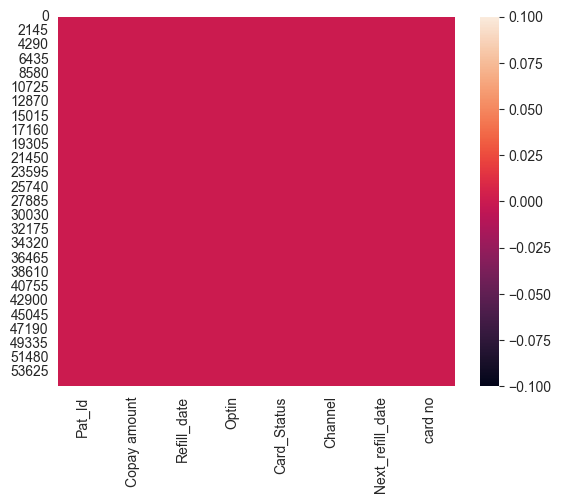

In [479]:
sns.heatmap(data.isnull())

### Drop Duplicates:-

In [480]:
data.drop_duplicates(inplace=True)
data.shape

(55757, 8)

The dataset contains information about patients' copay amounts, refill dates, opt-in status, card status, channel, next refill dates, and card numbers.

In [481]:
data.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Pat_Id,55757.0,NaN,NaN,NaN,4977.74961,1.0,2489.0,4996.0,7455.0,10005.0,2873.705094
Copay amount,55757.0,NaN,NaN,NaN,188.918322,0.0,25.0,40.0,100.0,5512.87,451.107514
Refill_date,55757,NaN,NaN,NaN,2014-06-22 23:45:18.288286720,2014-01-01 00:00:00,2014-03-25 00:00:00,2014-06-20 00:00:00,2014-09-19 00:00:00,2014-12-31 00:00:00,NaN
Optin,55757,2,Y,42496,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Card_Status,55757,2,Active,48003,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Channel,55757,2,Virtual,46253,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Next_refill_date,55757,NaN,NaN,NaN,2014-08-02 01:55:43.673440256,2014-01-31 00:00:00,2014-04-24 00:00:00,2014-07-20 00:00:00,2014-12-10 00:00:00,2015-01-30 00:00:00,NaN
card no,55757,12744,1-7704,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [482]:
len(data["Pat_Id"].unique())

10005

```
Unique no of Pat_id : 10005


```

In [483]:
data.head()

,Pat_Id,Copay amount,Refill_date,Optin,Card_Status,Channel,Next_refill_date,card no
0,1,1745.71,2014-02-21,Y,Expired,Virtual,2014-03-23,1-1
1,2,35.00,2014-01-01,Y,Expired,Virtual,2014-01-31,1-2
2,3,50.00,2014-08-15,N,Active,Virtual,2014-09-14,1-3
3,3,50.00,2014-09-27,N,Active,Virtual,2014-12-26,1-3
4,3,50.00,2014-10-29,N,Active,Virtual,2015-01-27,1-3


In [484]:
data["Optin"].value_counts()

Optin
Y    42496
N    13261
Name: count, dtype: int64

In [485]:
data["Card_Status"].value_counts()

Card_Status
Active     48003
Expired     7754
Name: count, dtype: int64

In [486]:
data["Channel"].value_counts()

Channel
Virtual    46253
Retail      9504
Name: count, dtype: int64

In [487]:
data["card no"].value_counts()

card no
1-7704    12
1-6100    12
1-2592    12
1-2586    12
1-5588    12
          ..
1-5937     1
1-5936     1
1-1038     1
1-5935     1
1-1        1
Name: count, Length: 12744, dtype: int64

### distribution of Copay amounts

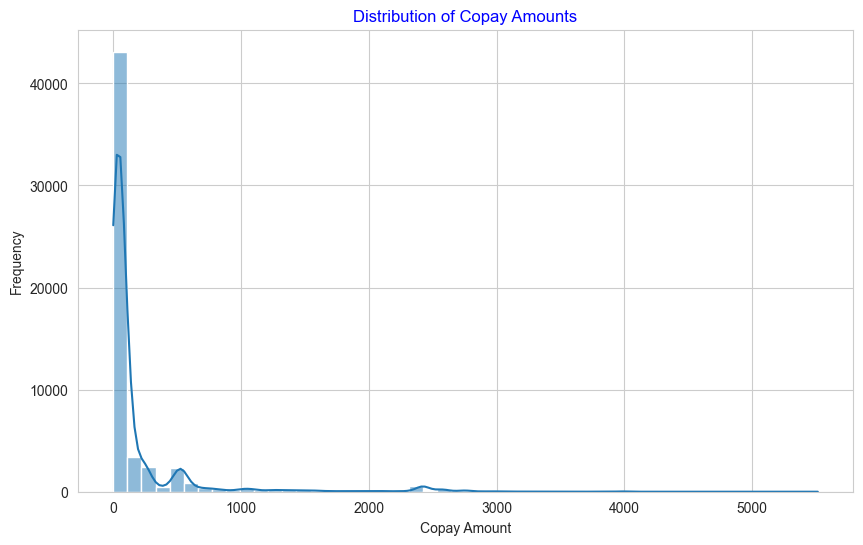

In [488]:
sns.set_style('whitegrid')
plt.figure(figsize=(10, 6))
sns.histplot(data['Copay amount'], bins=50, kde=True)
plt.title('Distribution of Copay Amounts',c="b")
plt.xlabel('Copay Amount')
plt.ylabel('Frequency')
plt.show()

```The distribution of copay amounts shows a right-skewed distribution, indicating that lower copay amounts are more common than higher ones.```

### Plot count of Optin status
### Plot count of Card Status

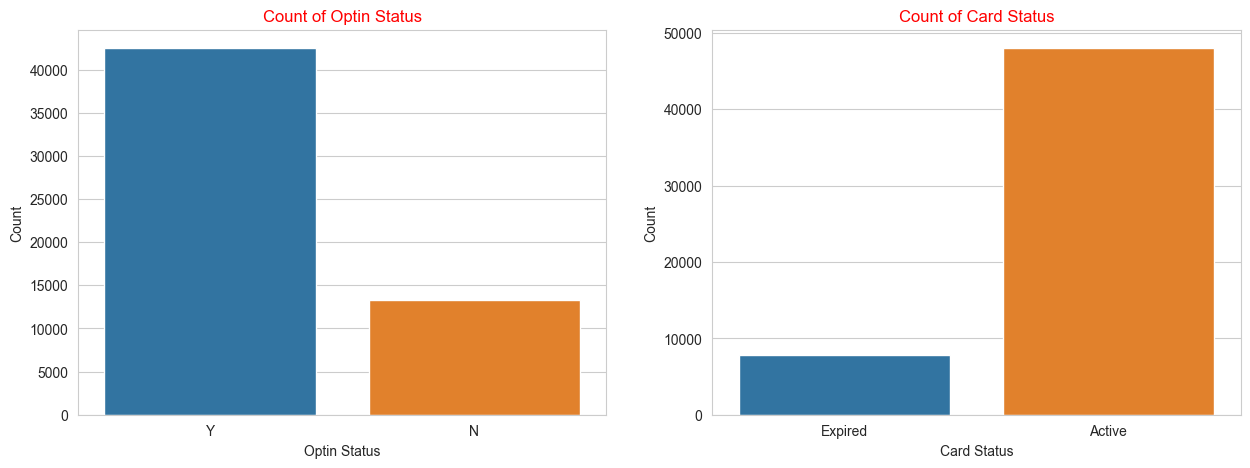

In [489]:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
sns.countplot(x='Optin', data=data)
plt.title('Count of Optin Status',c="r")
plt.xlabel('Optin Status')
plt.ylabel('Count')
# plt.show()
plt.subplot(1, 2, 2)
sns.countplot(x='Card_Status', data=data)
plt.title('Count of Card Status',c="r")
plt.xlabel('Card Status')
plt.ylabel('Count')
plt.show()

```The count of optin status reveals that a majority of the entries have opted in.```

```The count of card status shows thatActive card number is more than expired card.```

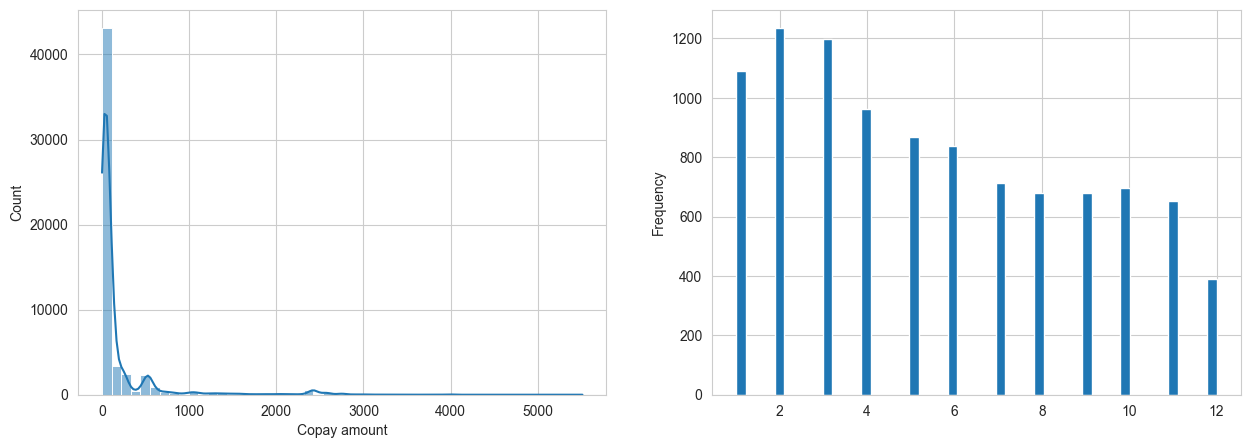

In [490]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.histplot(data["Copay amount"],kde=True,bins=50)
plt.subplot(1,2,2)
data["Pat_Id"].value_counts().plot(kind="hist",bins=50)
plt.show()

<Figure size 1500x800 with 0 Axes>

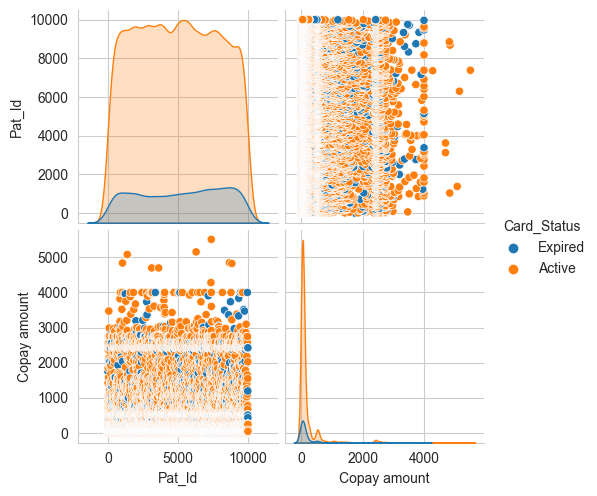

In [491]:
plt.figure(figsize=(15,8))
sns.pairplot(data,hue="Card_Status")

In [492]:
data["Copay amount"].mean()+0.5*data["Copay amount"].std()

414.4720788288865

In [493]:
slippage_data = data.dropna(subset=['Next_refill_date'])
slippage_data = slippage_data[slippage_data['Next_refill_date'] > slippage_data['Refill_date']]
slippage_data['days_to_next_refill'] = (slippage_data['Next_refill_date'] - slippage_data['Refill_date']).dt.days

<Axes: xlabel='days_to_next_refill', ylabel='count'>

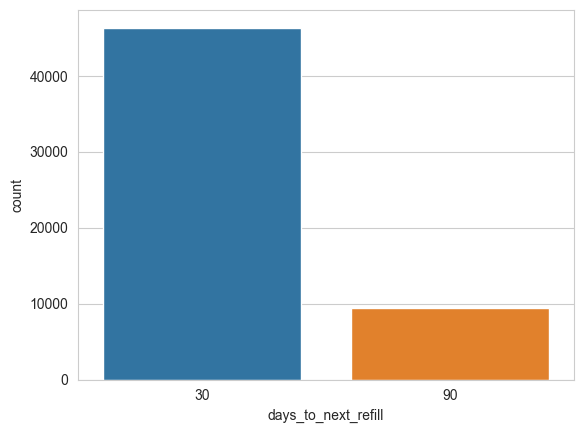

In [494]:
sns.countplot(x='days_to_next_refill', data=slippage_data)

In [495]:
slippage_data.head()

,Pat_Id,Copay amount,Refill_date,Optin,Card_Status,Channel,Next_refill_date,card no,days_to_next_refill
0,1,1745.71,2014-02-21,Y,Expired,Virtual,2014-03-23,1-1,30
1,2,35.00,2014-01-01,Y,Expired,Virtual,2014-01-31,1-2,30
2,3,50.00,2014-08-15,N,Active,Virtual,2014-09-14,1-3,30
3,3,50.00,2014-09-27,N,Active,Virtual,2014-12-26,1-3,90
4,3,50.00,2014-10-29,N,Active,Virtual,2015-01-27,1-3,90


<Axes: ylabel='Copay amount'>

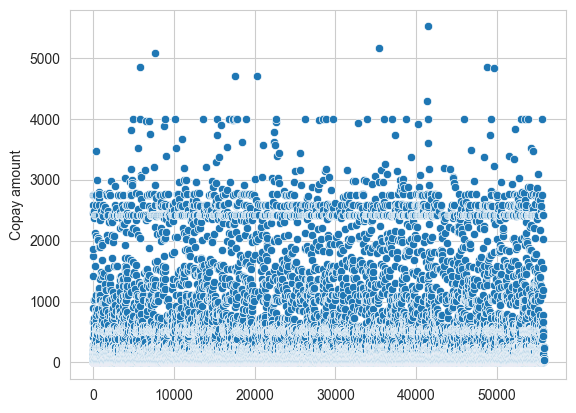

In [496]:
sns.scatterplot(slippage_data["Copay amount"])

<Axes: xlabel='Copay amount', ylabel='Count'>

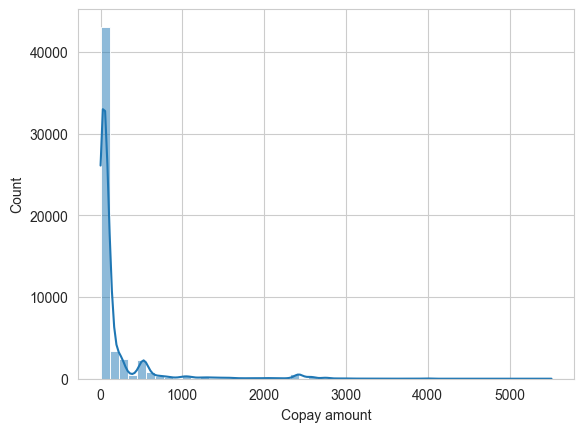

In [497]:
sns.histplot(slippage_data["Copay amount"],bins=50,kde=True)

<Axes: xlabel='days_to_next_refill', ylabel='Count'>

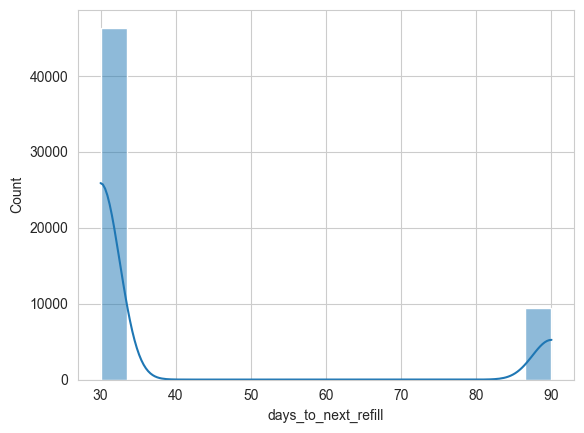

In [498]:
sns.histplot(slippage_data['days_to_next_refill'],kde=True)

In [499]:
data["Pat_Id"].unique()

array([    1,     2,     3, ..., 10003, 10004, 10005], dtype=int64)

In [500]:
slippage_threshold = slippage_data['days_to_next_refill'].mean() + 0.5 * slippage_data['days_to_next_refill'].std()


In [501]:
print('Slippage Threshold (days):', slippage_threshold)

Slippage Threshold (days): 51.3113524510564


In [502]:
slippage_data["Copay amount"].mean()+0.5*slippage_data["Copay amount"].std()

414.4720788288865

```
Pat_Id which is paying highly Copay ammount (5512.87 rs)
```

In [503]:
slippage_data[slippage_data["Copay amount"]==slippage_data["Copay amount"].max()]

,Pat_Id,Copay amount,Refill_date,Optin,Card_Status,Channel,Next_refill_date,card no,days_to_next_refill
41439,7385,5512.87,2014-07-20,Y,Active,Virtual,2014-08-19,1-7385,30


In [504]:
slippage_data.head()

,Pat_Id,Copay amount,Refill_date,Optin,Card_Status,Channel,Next_refill_date,card no,days_to_next_refill
0,1,1745.71,2014-02-21,Y,Expired,Virtual,2014-03-23,1-1,30
1,2,35.00,2014-01-01,Y,Expired,Virtual,2014-01-31,1-2,30
2,3,50.00,2014-08-15,N,Active,Virtual,2014-09-14,1-3,30
3,3,50.00,2014-09-27,N,Active,Virtual,2014-12-26,1-3,90
4,3,50.00,2014-10-29,N,Active,Virtual,2015-01-27,1-3,90


In [505]:
slippage_data["days_to_next_refill"].value_counts()

days_to_next_refill
30    46380
90     9377
Name: count, dtype: int64

```
For existing  data we can apply (Copay ammount >414.4720788288865 or days_to_next_refill<51.3113524510564) and (Card_Status =Active) or (Optin=Y) 

In [506]:
slippage_data[(slippage_data["Copay amount"]> 414.4720788288865) | (slippage_data["days_to_next_refill"]<51.3113524510564)]["days_to_next_refill"].value_counts()

days_to_next_refill
30    46380
90      672
Name: count, dtype: int64

In [507]:
new_existing_data=slippage_data[(slippage_data["Copay amount"]> 414.4720788288865) | (slippage_data["days_to_next_refill"]<51.3113524510564)]

In [508]:
new_existing_data.head()

,Pat_Id,Copay amount,Refill_date,Optin,Card_Status,Channel,Next_refill_date,card no,days_to_next_refill
0,1,1745.71,2014-02-21,Y,Expired,Virtual,2014-03-23,1-1,30
1,2,35.00,2014-01-01,Y,Expired,Virtual,2014-01-31,1-2,30
2,3,50.00,2014-08-15,N,Active,Virtual,2014-09-14,1-3,30
5,3,50.00,2014-11-03,N,Active,Virtual,2014-12-03,1-3,30
6,3,50.00,2014-12-09,N,Active,Virtual,2015-01-08,1-3,30


In [509]:
import warnings
warnings.filterwarnings("ignore")

In [510]:
new_existing_data[((new_existing_data['Optin'] == 'Y') | (new_existing_data['Card_Status'] == 'Active'))]
new_existing_data

,Pat_Id,Copay amount,Refill_date,Optin,Card_Status,Channel,Next_refill_date,card no,days_to_next_refill
0,1,1745.71,2014-02-21,Y,Expired,Virtual,2014-03-23,1-1,30
1,2,35.00,2014-01-01,Y,Expired,Virtual,2014-01-31,1-2,30
2,3,50.00,2014-08-15,N,Active,Virtual,2014-09-14,1-3,30
5,3,50.00,2014-11-03,N,Active,Virtual,2014-12-03,1-3,30
6,3,50.00,2014-12-09,N,Active,Virtual,2015-01-08,1-3,30
...,...,...,...,...,...,...,...,...,...
55751,10005,45.00,2014-04-01,N,Active,Virtual,2014-05-01,2-10005,30
55752,10005,35.00,2014-05-01,N,Active,Virtual,2014-05-31,2-10005,30
55753,10005,80.00,2014-07-01,N,Active,Virtual,2014-07-31,2-10005,30
55754,10005,45.00,2014-08-01,N,Active,Virtual,2014-08-31,2-10005,30


In [511]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [512]:
# Optin	Card_Status	Channel
slippage_data["OPtin"]=encoder.fit_transform(slippage_data["Optin"])
slippage_data["Card_status"]=encoder.fit_transform(slippage_data["Card_Status"])
slippage_data["CHannel"]=encoder.fit_transform(slippage_data["Channel"])
slippage_data["Card no"]=encoder.fit_transform(slippage_data["card no"])

In [513]:
slippage_data.drop(["Optin","Channel","Card_Status","card no"],axis=1,inplace=True)

In [514]:
slippage_data.head()

,Pat_Id,Copay amount,Refill_date,Next_refill_date,days_to_next_refill,OPtin,Card_status,CHannel,Card no
0,1,1745.71,2014-02-21,2014-03-23,30,1,1,1,0
1,2,35.00,2014-01-01,2014-01-31,30,1,1,1,1117
2,3,50.00,2014-08-15,2014-09-14,30,0,0,1,2228
3,3,50.00,2014-09-27,2014-12-26,90,0,0,1,2228
4,3,50.00,2014-10-29,2015-01-27,90,0,0,1,2228


<Axes: >

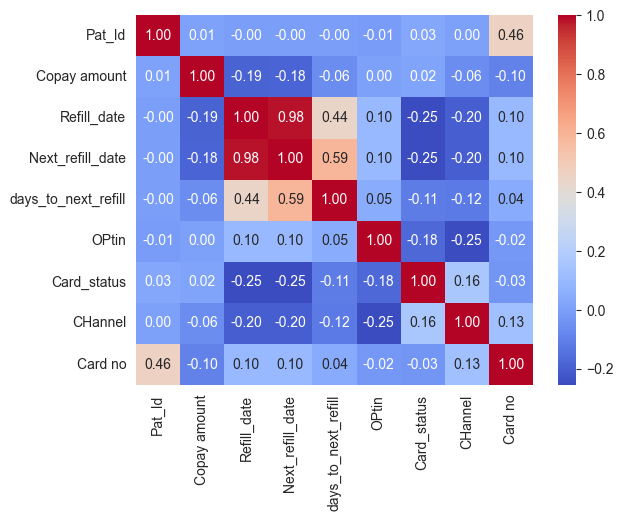

In [515]:
sns.heatmap(slippage_data.corr(),annot=True,cmap='coolwarm', fmt=".2f")

given Features is not correlated to each other